In [ ]:
!pip install ipython-autotime
%load_ext autotime

time: 209 µs (started: 2021-06-16 07:12:56 +00:00)


In [ ]:
# Data : images classification

In [2]:
!pip install bing-image-downloader

In [3]:
!mkdir images

In [7]:
from bing_image_downloader import downloader
downloader.download("rose",limit=15,output_dir='images',adult_filter_off=True)

[%] Downloading Images to /content/images/rose


[!!]Indexing page: 1

[%] Indexed 15 Images on Page 1.


[%] Downloading Image #1 from https://res.cloudinary.com/bloomnation/c_pad,d_vendor:global:catalog:product:image.png,f_auto,fl_preserve_transparency,q_auto/v1582065462/vendor/2961/catalog/product/2/0/20150124123713_file_54c391f9051a6.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://www.gardenfactoryny.com/media/catalog/product/cache/b456f9c06a31f834e13ba33f49c2d862/1/5/152085_iXgmC7xdydnBRH3e.jpeg
[%] File Downloaded !

[%] Downloading Image #3 from https://i.pinimg.com/originals/d6/de/f1/d6def1939703699dcc99f426ee0a3eca.jpg
[%] File Downloaded !

[%] Downloading Image #4 from http://plants.tlcgarden.com/Content/Images/Photos/H099-17.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://www.jacksonandperkins.com/images/xxl/27740.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://altmanplants.com/wp-content/uploads/True-Gratitude-1-1024x686.j

In [8]:
downloader.download("ceiling fan",limit=15,output_dir='images',adult_filter_off=True)

[%] Downloading Images to /content/images/ceiling fan


[!!]Indexing page: 1

[%] Indexed 15 Images on Page 1.


[%] Downloading Image #1 from https://upload.wikimedia.org/wikipedia/commons/a/a3/The_Black_Beauty.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://www.everyceilingfans.com/wp-content/uploads/2016/07/Craftmade-MO56OB4-Midoro-Ceiling-Fan-with-Light-5622-Span-Oiled-Bronze-1080x608.png
[%] File Downloaded !

[%] Downloading Image #3 from https://www.lightsonline.com/media/catalog/product/cache/bd76ad090827cdaa9bb0400154780c49/5/4/54149.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://topportalreview.com/wp-content/uploads/2018/10/Hyperikon-56-Inch-Sleek-Contemporary-Ceiling-Fan-5-Blade-LED-Ceiling-Fan-38W-Black-Industrial-Modern-Ceiling-Fan-with-Integrated-LED-Light-Panel-110V-Remote-Controlled-4000K.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://i.ebayimg.com/images/g/2pAAAOSw40xfKWo-/s-l640.jpg
[%] File Downloaded !

[%] Downl

In [9]:
downloader.download("neem plant",limit=15,output_dir='images',adult_filter_off=True)

[%] Downloading Images to /content/images/neem plant


[!!]Indexing page: 1

[%] Indexed 15 Images on Page 1.


[%] Downloading Image #1 from https://primalgroup.com/wp-content/uploads/2016/09/bigstock-Neem-Leaves-medicinal-Plant-65545858.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://cdn.shopify.com/s/files/1/2858/6430/products/Neem_leaf-Azadirachta_indica_1800x1800.jpg?v=1569304059
[%] File Downloaded !

[%] Downloading Image #3 from https://i.ebayimg.com/images/i/142849631823-0-1/s-l1000.jpg
[%] File Downloaded !

[%] Downloading Image #4 from http://img-aws.ehowcdn.com/877x500p/photos.demandstudios.com/162/26/fotolia_3213287_XS.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://i.ebayimg.com/images/g/xy0AAOSwLAtf3NTK/s-l640.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://i.ebayimg.com/images/g/FZIAAOSwuCdbmp7A/s-l640.jpg
[%] File Downloaded !

[%] Downloading Image #7 from https://www.favcounter.com/wp-content/uploads/2018/05/neem-pl

In [12]:
import numpy as np
a=np.array([[8,7,6,1,2],
            [4,5,7,8,9]])
a.ndim

2

In [13]:
a.flatten()

array([8, 7, 6, 1, 2, 4, 5, 7, 8, 9])

In [21]:
import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize

target = []
images = []
flat_data = []

DATADIR = '/content/images'
CATEGORIES = ['rose', 'ceiling fan','neem plant']

for category in  CATEGORIES:
  class_num = CATEGORIES.index(category)
  path = os.path.join(DATADIR,category)
  for img in os.listdir(path):
   img_array =  imread(os.path.join(path,img))
   #print(img_array.shape)
   #plt.imshow(img_array)
   img_resized = resize(img_array,(150,150,3))
   flat_data.append(img_resized.flatten())
   images.append(class_num)
   target.append(class_num)

flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)   
  

In [24]:
len(flat_data[0])

67500

In [ ]:
len(flat_data[0])

67500

time: 4.22 ms (started: 2021-06-16 08:12:59 +00:00)


In [25]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2])

<BarContainer object of 3 artists>

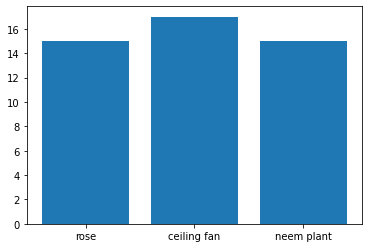

In [27]:
unique,count = np.unique(target,return_counts=True)
plt.bar(CATEGORIES,count)

In [35]:
#spliting data for training
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(flat_data,target,test_size=0.3,random_state=109)

In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid = [{'C':[1,10,100,1000],'kernel':['linear']},
              {'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']},
]
svc = svm.SVC(probability=True)
clf = GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train) 

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [38]:
y_pred = clf.predict(x_test)
y_pred


array([0, 0, 2, 0, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1])

In [40]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [43]:
accuracy_score(y_pred,y_test)

0.8666666666666667

In [44]:
confusion_matrix(y_pred,y_test)

array([[2, 0, 1],
       [0, 7, 0],
       [0, 1, 4]])